In [7]:
import scipy, time, random, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from common.data_parser import *
from common.misc import *

In [8]:
def preprocess(df):
    
    df = drop_cols(df, 0.05)

    df = df.replace(np.NaN, 0)
    df = df.astype('int')
    print("Number of missing values:", count_missing_vals(df))
    return df


def drop_cols(df, cutoff):
    row_cnt = df.shape[0]
    dropped_cols = []

    # Iterate over columns and calculate relative amount of missing data
    for col in df:
        missing_cnt = df[col].isna().sum()

        # drop col if above cutoff
        if missing_cnt / row_cnt > cutoff:

            dropped_cols.append(col)

    df = df.drop(dropped_cols, axis=1)
    print("Dropped", dropped_cols)
    return df


def replace_missing_vals(df):
    for col in df:
        for entry in df[col]:
            if entry != True:
                df[col][entry] = 0
    return df

def count_missing_vals(df):   
    # Helopful ressource: https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345
    return df.isna().sum().sum()

In [9]:
df = parse_companies()
df = pd.concat(df)
df = preprocess(df)

bancrupt_df = df.loc[df['class'] == 1]
solvent_df = df.loc[df['class'] == 0].sample(bancrupt_df.shape[0])
df = pd.concat([solvent_df, bancrupt_df])

Dropped ['Attr21', 'Attr27', 'Attr37']
Number of missing values: 0


In [10]:
data = df.iloc[:,2:-1]
labels = df.iloc[:,[-1]]
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=1 )

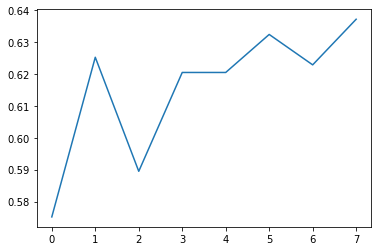

In [11]:
max_k = 60
accuracy_list = []
for k in range(2, max_k):
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    result = pd.DataFrame()
    result["class"] = model.predict(x_test)
    accuray = compare_df(result, y_test, "class")[0]
    accuracy_list.append(accuray)
    #print("k = %s Accuracy = %s" % (k, accuray))
plt.plot(accuracy_list)